<a href="https://colab.research.google.com/github/ilhamajilaksono/projek_python/blob/main/klasifikasiUcapanHm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Buat dataset untuk analisis sentimen
import pandas as pd

data = {
    'text': [
        'aku suka dengan mu',
        'saya tidak suka kamu',
        'layanan pelayanan yang tidak ramah',
        'makanan tidak enak dan mahal',
        'barang yang dibeli tidak sesuai saat tiba',
        'sangat kecewa dengan kualitas jasa antar',
        'barang tidak sesuai ekspetasi',
        'menu diwarung ini sangat membosankan',
        'penginapan ini sangat bagus dan rapi',
        'makanan yang berkualitas dan terjangkau',
        'pelayanan cepat dan berkelas',
        'produk asli dan berkualitas',
        'tempat parkir yang terlalu jauh dengan lokasi wisata',
        'lokasi yang menguntungkan',
        'rasa makanan tidak enak',
        'layanan jasa yang baik',
        'film yang membosankan',
        'tempat yang kotor dan tidak terawat',
        'pelayanan yang lambat dan tidak ramah',
        'menu yang monoton'
    ],
    'label': [
        1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 0, 1, 0, 1, 0, 0, 0, 0
    ]  # 1: Positive, 0: Negative
}

# Simpan dataset ke file CSV
df = pd.DataFrame(data)
df.to_csv('sentiment_dataset.csv', index=False)


Epoch 1/20
2/2 [==============================] - 1s 255ms/step - loss: 1.9670 - accuracy: 0.3125 - val_loss: 1.9253 - val_accuracy: 0.5000
Epoch 2/20
2/2 [==============================] - 0s 31ms/step - loss: 1.9084 - accuracy: 0.5625 - val_loss: 1.8808 - val_accuracy: 0.5000
Epoch 3/20
2/2 [==============================] - 0s 31ms/step - loss: 1.8504 - accuracy: 0.7500 - val_loss: 1.8386 - val_accuracy: 0.5000
Epoch 4/20
2/2 [==============================] - 0s 31ms/step - loss: 1.7906 - accuracy: 0.6875 - val_loss: 1.7975 - val_accuracy: 0.5000
Epoch 5/20
2/2 [==============================] - 0s 52ms/step - loss: 1.7460 - accuracy: 0.6875 - val_loss: 1.7579 - val_accuracy: 0.5000
Epoch 6/20
2/2 [==============================] - 0s 37ms/step - loss: 1.6839 - accuracy: 0.6875 - val_loss: 1.7205 - val_accuracy: 0.5000
Epoch 7/20
2/2 [==============================] - 0s 33ms/step - loss: 1.6390 - accuracy: 0.6875 - val_loss: 1.6845 - val_accuracy: 0.5000
Epoch 8/20
2/2 [==========

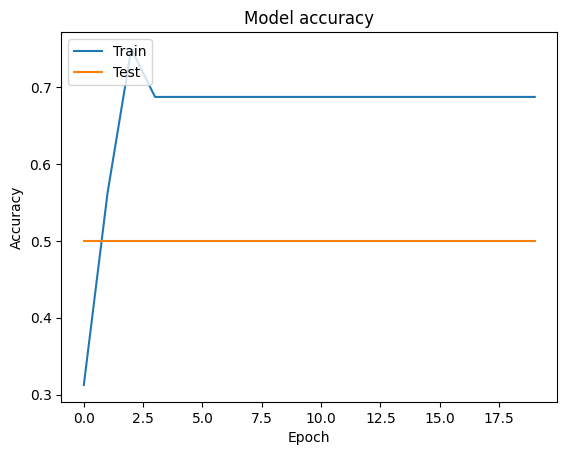

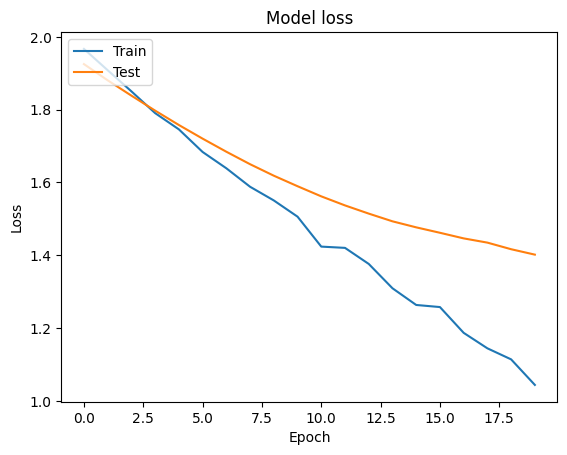

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import pandas as pd

# Memuat dataset
data_path = 'sentiment_dataset.csv'
max_features = 1000  # Jumlah kata unik yang akan digunakan
maxlen = 20  # Panjang maksimum dari setiap review
embedding_dims = 50  # Dimensi dari embedding layer
batch_size = 8
epochs = 20

# Preprocess text data
df = pd.read_csv(data_path)

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
x = pad_sequences(sequences, maxlen=maxlen)
y = df['label'].values

# Split dataset menjadi training dan testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Membangun model CNN
model = Sequential()

# Embedding layer
model.add(Embedding(max_features, embedding_dims, input_length=maxlen))

# Convolutional layer
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())

# Fully connected layer
model.add(Dense(128, activation='relu', kernel_regularizer='l2'))  # Menambahkan L2 regularization
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Optimizer dengan learning rate yang disesuaikan
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Melatih model
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_test, y_test),
                    verbose=1)

# Evaluasi model
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print(f'Test score: {score}')
print(f'Test accuracy: {acc}')


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
